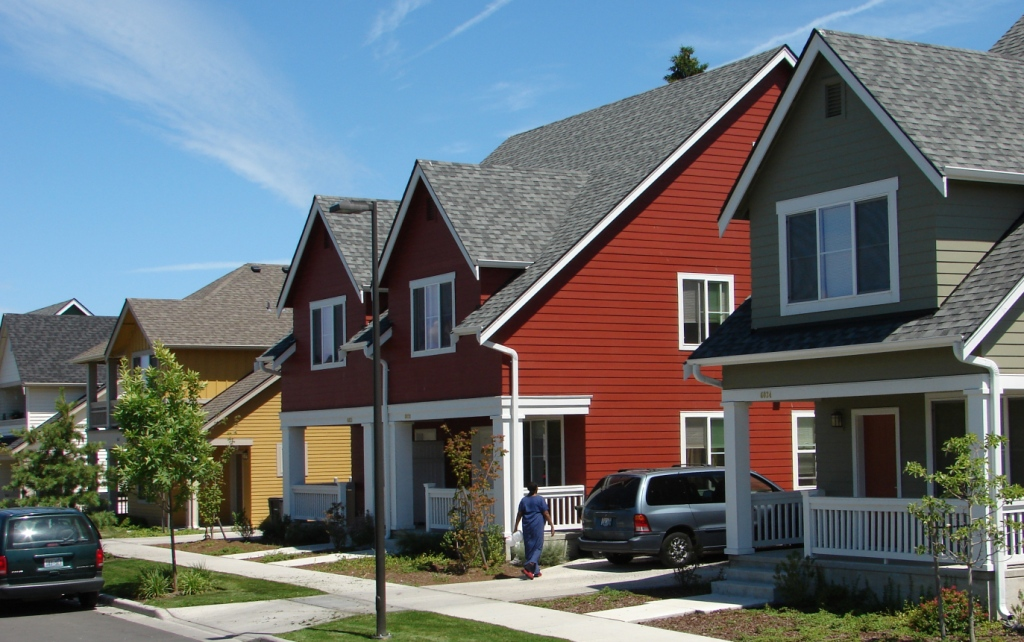

#### Este será um estudo mais aprofundado do histórico de preço de casas em King County, um condado no estado de Washington-US. Neste notebook, utilizaremos o modelo de regressão para descobrirmos as melhores condições de valores.

##### Features
* id - Id único de cada casa vendida.
* date - Data da venda do imóvel.
* price - Preço de cada imóvel vendido.
* bedrooms - Número de quartos.
* bathrooms - Número de banheiros onde 0.5 como cômodo com banheiro sem chuveiro.
* sqft_living - Metragem quadrada do espaço interior das casas.
* sqft_lot - Metragem quadrada do terreno.
* floors - Número de andares.
* waterfront - Se o imóvel é a beira-mar ou não, indicado por 0 e 1.
* view - Um índice de 0 a 4 de quão boa é a vista da propriedade.
* condition - Um índice de 1 a 5 das condições do imóvel.
* grade - Um índice de 1 a 13, onde 1-3 fica aquém da construção e projeto do edifício, 7 tem um nível médio de construção e projeto e 11-13 tem um alto nível de qualidade de construção e projeto.
* sqft_above - A metragem quadrada do espaço interior da habitação que está acima do nível do solo.
* sqft_basement - A metragem quadrada do espaço interior da habitação que está abaixo do nível do solo.
* yr_built - O ano em que a casa foi inicialmente construída.
* yr_renovated - Ano da última reforma do imóvel.
* zipcode - Código de área do imóvel.
* lat - Latitude.
* long - Longitude.
* sqft_living15 - A metragem quadrada do espaço habitacional interior para os 15 vizinhos mais próximos.
* sqft_lot15 - A metragem quadrada dos lotes dos 15 vizinhos mais próximos.

#### Abaixo, importamos as principais bibliotecas.

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression,RidgeCV, ElasticNet
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_validate
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from joblib import dump, load

#### Abaixo, defino uma função para redimensionamento dos gráficos.

In [136]:
def resizeplot(x,y,d):
    plt.figure(figsize=(x,y),dpi=d)

In [137]:
df = pd.read_csv('csv/kc_house_data.csv')

In [138]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

#### A feature de 'data' não está de acordo com seu tipo, faremos a correção.

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [140]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Nenhum valor ausente.

In [141]:
df['date'] = pd.to_datetime(df['date'])

#### Feature corrigida, vamos ver como ficou.

In [142]:
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

#### As features de "bathrooms" e "floors" estão como tipo float, deixaremos como inteiros.

In [143]:
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)

In [144]:
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3          1         1180   
1  6414100192 2014-12-09  538000.0         3          2         2570   
2  5631500400 2015-02-25  180000.0         2          1          770   
3  2487200875 2014-12-09  604000.0         4          3         1960   
4  1954400510 2015-02-18  510000.0         3          2         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650       1           0     0  ...      7        1180              0   
1      7242       2           0     0  ...      7        2170            400   
2     10000       1           0     0  ...      6         770              0   
3      5000       1           0     0  ...      7        1050            910   
4      8080       1           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

#### Abaixo, vamos visualizar a "estatística" do data frame.

In [12]:
df.describe().drop('id',axis=1)

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      1.749734   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.734873    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.000000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.000000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.000000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.446213      0.007542      0.234303      3.409430      7.656873   
std        0.551894      0.086517      0.766318      0.650743      1.175459   
min        1.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.000000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.000000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  21613.000000   21613.000000  21613.000000  21613.000000  21613.000000   
mean    1788.390691     291.509045   1971.005136     84.402258  98077.939805   
std      828.090978     442.575043     29.373411    401.679240     53.505026   
min      290.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1190.000000       0.000000   1951.000000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98118.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000   21613.000000   21613.000000  
mean      47.560053   -122.213896    1986.552492   12768.455652  
std        0.138564      0.140828     685.391304   27304.179631  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471000   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.230000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

#### Vejamos como os preços se dispõe por quartos.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

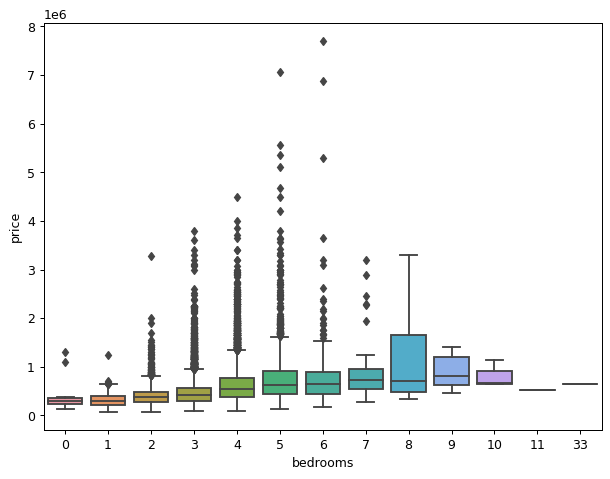

In [150]:
resizeplot(8,6,90)
sns.boxplot(data=df,x='bedrooms',y='price')

#### 11 e 33 quartos? é a mansão do Mike Tyson? Vamos investigar.

In [151]:
df[df['bedrooms']==33]

id       date     price  bedrooms  bathrooms  sqft_living  \
15870  2402100895 2014-06-25  640000.0        33          1         1620   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
15870      6000       1           0     0  ...      7        1040   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
15870            580      1947             0    98103  47.6878 -122.331   

       sqft_living15  sqft_lot15  
15870           1330        4700  

[1 rows x 21 columns]

In [152]:
df[df['bedrooms']==3].mean(numeric_only=True)

id               4.535884e+09
price            4.662321e+05
bedrooms         3.000000e+00
bathrooms        1.599959e+00
sqft_living      1.805837e+03
sqft_lot         1.441479e+04
floors           1.406352e+00
waterfront       6.514658e-03
view             1.878054e-01
condition        3.415513e+00
grade            7.472516e+00
sqft_above       1.584442e+03
sqft_basement    2.213950e+02
yr_built         1.971813e+03
yr_renovated     7.600143e+01
zipcode          9.807648e+04
lat              4.755148e+01
long            -1.222133e+02
sqft_living15    1.835444e+03
sqft_lot15       1.280934e+04
dtype: float64

#### O valor do preço da casa de 33 quartos condiz com a média de preços dos imóveis e 3 ou 4 quartos além de ser incompatível com as outras features.

In [153]:
df[df['bedrooms']==11].mean(numeric_only=True)

id               1.773101e+09
price            5.200000e+05
bedrooms         1.100000e+01
bathrooms        3.000000e+00
sqft_living      3.000000e+03
sqft_lot         4.960000e+03
floors           2.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        3.000000e+00
grade            7.000000e+00
sqft_above       2.400000e+03
sqft_basement    6.000000e+02
yr_built         1.918000e+03
yr_renovated     1.999000e+03
zipcode          9.810600e+04
lat              4.755600e+01
long            -1.223630e+02
sqft_living15    1.420000e+03
sqft_lot15       4.960000e+03
dtype: float64

#### Mesma situação para os 11 quartos. Vamos tratá-los.

In [154]:
df[df['bedrooms']==10]

id       date      price  bedrooms  bathrooms  sqft_living  \
13314   627300145 2014-08-14  1148000.0        10          5         4590   
15161  5566100170 2014-10-29   650000.0        10          2         3610   
19254  8812401450 2014-12-29   660000.0        10          3         2920   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
13314     10920       1           0     2  ...      9        2500   
15161     11914       2           0     0  ...      7        3010   
19254      3745       2           0     0  ...      7        1860   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
13314           2090      2008             0    98004  47.5861 -122.113   
15161            600      1958             0    98006  47.5705 -122.175   
19254           1060      1913             0    98105  47.6635 -122.320   

       sqft_living15  sqft_lot15  
13314           2730       10400  
15161           2040       11914  
19254           1810        3745  

[3 rows x 21 columns]

In [155]:
df= df.drop([15870,8757])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

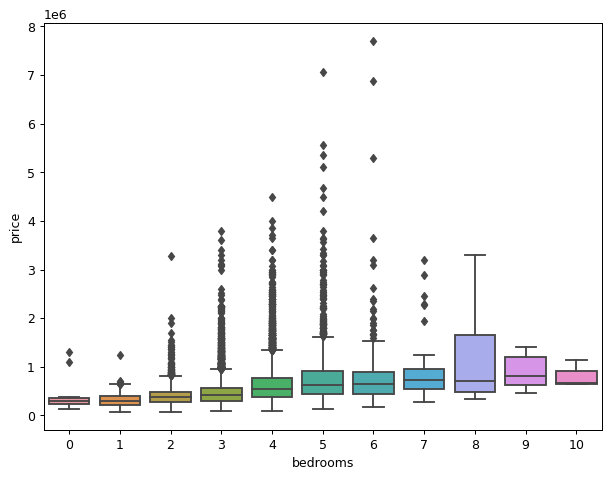

In [156]:
resizeplot(8,6,90)
sns.boxplot(data=df,x='bedrooms',y='price')

#### Abaixo, inciaremos o tratamento da remoção dos outliers.

In [157]:
df[(df['bedrooms']==0)&(df['price']>=1095000)&(df['bedrooms']<=129565)]

id       date      price  bedrooms  bathrooms  sqft_living  \
875   6306400140 2014-06-12  1095000.0         0          0         3064   
6994  2954400190 2014-06-24  1295650.0         0          0         4810   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
875       4764       3           0     2  ...      7        3064   
6994     28008       2           0     0  ...     12        4810   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
875               0      1990             0    98102  47.6362 -122.322   
6994              0      1990             0    98053  47.6642 -122.069   

      sqft_living15  sqft_lot15  
875            2360        4000  
6994           4740       35061  

[2 rows x 21 columns]

In [158]:
df = df.drop([875,6994])

In [159]:
df[(df['bedrooms']==1)&(df['price']==1247000)]

id       date      price  bedrooms  bathrooms  sqft_living  \
8445  724069023 2015-04-14  1247000.0         1          1         1810   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
8445      5070       1           1     4  ...      8        1230   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
8445            580      1967             0    98075  47.5814 -122.081   

      sqft_living15  sqft_lot15  
8445           2280        5070  

[1 rows x 21 columns]

In [160]:
df = df.drop([8445])

In [161]:
df[(df['bedrooms']==2)&(df['price']==3278000)]

id       date      price  bedrooms  bathrooms  sqft_living  \
2444  7524900003 2014-12-10  3278000.0         2          1         6840   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
2444     10000       2           1     4  ...     11        4350   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
2444           2490      2001             0    98008  47.6042 -122.112   

      sqft_living15  sqft_lot15  
2444           3120       12300  

[1 rows x 21 columns]

In [162]:
df = df.drop([2444])

In [163]:
bp = px.box(df,x='bedrooms',y='price')
bp.show()

In [164]:
df[(df['bedrooms']==3)&(df['price']>=3300000)&(df['price']==3800000)]

id       date      price  bedrooms  bathrooms  sqft_living  \
19017  2303900100 2014-09-11  3800000.0         3          4         5510   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
19017     35000       2           0     4  ...     13        4910   

       sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
19017            600      1997             0    98177  47.7296 -122.37   

       sqft_living15  sqft_lot15  
19017           3430       45302  

[1 rows x 21 columns]

In [165]:
df = df.drop([2864,7989,18199,19017])

In [166]:
df[(df['bedrooms']==4)&(df['price']==4489000)]

id       date      price  bedrooms  bathrooms  sqft_living  \
8638  3835500195 2014-06-18  4489000.0         4          3         6430   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
8638     27517       2           0     0  ...     12        6430   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
8638              0      2001             0    98004  47.6208 -122.219   

      sqft_living15  sqft_lot15  
8638           3720       14592  

[1 rows x 21 columns]

In [167]:
df = df.drop([8638])

In [168]:
df[(df['bedrooms']==5)&(df['price']>=4208000)&(df['price']<=7062500)]

id       date      price  bedrooms  bathrooms  sqft_living  \
1164   1247600105 2014-10-20  5110800.0         5          5         8010   
1448   8907500070 2015-04-13  5350000.0         5          5         8000   
2626   7738500731 2014-08-15  4500000.0         5          5         6640   
3914   9808700762 2014-06-11  7062500.0         5          4        10040   
4411   2470100110 2014-08-04  5570000.0         5          5         9200   
8092   1924059029 2014-06-17  4668000.0         5          6         9640   
12370  6065300370 2015-05-06  4208000.0         5          6         7440   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
1164      45517       2           1     4  ...     12        5990   
1448      23985       2           0     4  ...     12        6720   
2626      40014       2           1     4  ...     12        6350   
3914      37325       2           1     2  ...     11        7680   
4411      35069       2           0     0  ...     13        6200   
8092      13068       1           1     4  ...     12        4820   
12370     21540       2           0     0  ...     12        5550   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1164            2020      1999             0    98033  47.6767 -122.211   
1448            1280      2009             0    98004  47.6232 -122.220   
2626             290      2004             0    98155  47.7493 -122.280   
3914            2360      1940          2001    98004  47.6500 -122.214   
4411            3000      2001             0    98039  47.6289 -122.233   
8092            4820      1983          2009    98040  47.5570 -122.210   
12370           1890      2003             0    98006  47.5692 -122.189   

       sqft_living15  sqft_lot15  
1164            3430       26788  
1448            4600       21750  
2626            3030       23408  
3914            3930       25449  
4411            3560       24345  
8092            3270       10454  
12370           4740       19329  

[7 rows x 21 columns]

In [169]:
df[df['bedrooms']==5].mean(numeric_only=True)

id               4.517188e+09
price            7.865998e+05
bedrooms         5.000000e+00
bathrooms        2.375390e+00
sqft_living      3.047545e+03
sqft_lot         1.676902e+04
floors           1.514678e+00
waterfront       1.186758e-02
view             4.097439e-01
condition        3.449094e+00
grade            8.272330e+00
sqft_above       2.407567e+03
sqft_basement    6.399788e+02
yr_built         1.974205e+03
yr_renovated     1.010618e+02
zipcode          9.807019e+04
lat              4.757417e+01
long            -1.222012e+02
sqft_living15    2.442706e+03
sqft_lot15       1.308947e+04
dtype: float64

In [170]:
df = df.drop([1164,1448,2626,3914,4411,8092,12370])

In [171]:
df[(df['bedrooms']==6)&(df['price']>=3100000)&(df['price']<=7700000)]

id       date      price  bedrooms  bathrooms  sqft_living  \
1315   7558700030 2015-04-13  5300000.0         6          6         7390   
6508   4217402115 2015-04-21  3650000.0         6          4         5480   
7252   6762700020 2014-10-13  7700000.0         6          8        12050   
7907   1068000375 2014-09-23  3200000.0         6          5         7100   
9254   9208900037 2014-09-19  6885000.0         6          7         9890   
12872  2424049029 2014-05-29  3100000.0         6          4         6980   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
1315      24829       2           1     4  ...     12        5000   
6508      19401       1           1     4  ...     11        3910   
7252      27600       2           0     3  ...     13        8570   
7907      18200       2           0     0  ...     13        5240   
9254      31374       2           0     4  ...     13        8860   
12872     15682       3           0     4  ...     12        5330   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1315            2390      1991             0    98040  47.5631 -122.210   
6508            1570      1936             0    98105  47.6515 -122.277   
7252            3480      1910          1987    98102  47.6298 -122.323   
7907            1860      1933          2002    98199  47.6427 -122.408   
9254            1030      2001             0    98039  47.6305 -122.240   
12872           1650      1999             0    98040  47.5552 -122.231   

       sqft_living15  sqft_lot15  
1315            4320       24619  
6508            3510       15810  
7252            3940        8800  
7907            3130        6477  
9254            4540       42730  
12872           3930       18367  

[6 rows x 21 columns]

In [172]:
df = df.drop([1315,6508,7252,7907,9254,12872])

In [173]:
df[(df['bedrooms']==7)&(df['price']>=1950000)&(df['price']<=3200000)]

id       date      price  bedrooms  bathrooms  sqft_living  \
556    5486800070 2014-06-20  1950000.0         7          3         4640   
7191   7159200005 2014-05-07  3200000.0         7          4         6210   
12777  1225069038 2014-05-05  2280000.0         7          8        13540   
14030  5316101075 2014-09-26  2885000.0         7          3         5350   
15022  2210500010 2014-09-30  2450000.0         7          4         4670   
15246  5536100005 2014-08-08  2300000.0         7          4         5310   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
556       15235       2           0     1  ...     11        2860   
7191       8856       2           0     2  ...     11        4760   
12777    307752       3           0     4  ...     12        9410   
14030     14400       2           0     0  ...     10        5020   
15022     23115       2           0     2  ...     11        4670   
15246      8816       2           0     0  ...     10        3650   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
556             1780      1965          2003    98040  47.5666 -122.231   
7191            1450      1910             0    98109  47.6307 -122.354   
12777           4130      1999             0    98053  47.6675 -121.986   
14030            330      1910             0    98112  47.6295 -122.285   
15022              0      1992             0    98039  47.6183 -122.227   
15246           1660      2013             0    98004  47.6221 -122.208   

       sqft_living15  sqft_lot15  
556             3230       20697  
7191            2940        5400  
12777           4850      217800  
14030           3050        7469  
15022           3240       13912  
15246           2920       10610  

[6 rows x 21 columns]

In [174]:
df = df.drop([556,7191,12777,14030,15022,15246])

In [175]:
df[(df['bedrooms']==2)&(df['price']>=1695000)&(df['price']<=1998000)]

id       date      price  bedrooms  bathrooms  sqft_living  \
3157   1827200265 2014-09-11  1899000.0         2          2         3690   
6691   2624089007 2015-03-20  1998000.0         2          2         3900   
18075  5457800930 2014-06-13  1695000.0         2          2         3170   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
3157      32044       2           1     4  ...     12        3690   
6691     920423       2           0     0  ...     12        3900   
18075      3000       2           0     2  ...     10        1990   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
3157               0      1989             0    98166  47.4485 -122.369   
6691               0      2009             0    98065  47.5371 -121.756   
18075           1180      1900             0    98109  47.6291 -122.351   

       sqft_living15  sqft_lot15  
3157            2310       26988  
6691            2720      411962  
18075           2980        5061  

[3 rows x 21 columns]

In [176]:
df = df.drop([3157,6691,18075])

In [177]:
df[(df['bedrooms']==3)&(df['price']>=3000000)&(df['price']<=3200000)]

id       date      price  bedrooms  bathrooms  sqft_living  \
656    3760500116 2014-11-20  3070000.0         3          2         3930   
7313   4131900066 2014-08-25  3100000.0         3          3         3920   
10465   333100295 2014-11-24  3120000.0         3          3         4490   
11535  8964800890 2015-01-09  3200000.0         3          3         4560   
20325   518500480 2014-08-11  3000000.0         3          3         4410   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
656       55867       1           1     4  ...      8        2330   
7313      13085       2           1     4  ...     11        3920   
10465     56609       2           1     4  ...     12        4490   
11535     13363       1           0     4  ...     11        2760   
20325     10756       2           1     4  ...     11        3430   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
656             1600      1957             0    98034  47.7022 -122.224   
7313               0      1996             0    98040  47.5716 -122.204   
10465              0      1993             0    98034  47.6997 -122.240   
11535           1800      1995             0    98004  47.6205 -122.214   
20325            980      2014             0    98056  47.5283 -122.205   

       sqft_living15  sqft_lot15  
656             2730       26324  
7313            3450       13287  
10465           2710       51330  
11535           4060       13362  
20325           3550        5634  

[5 rows x 21 columns]

In [178]:
df = df.drop([656,7313,10465,11535,20325])

In [179]:
df[(df['bedrooms']==4)&(df['price']>=3204000)&(df['price']<=4000000)]

id       date      price  bedrooms  bathrooms  sqft_living  \
2085   8106100105 2014-11-14  3850000.0         4          4         5770   
4149   6447300265 2014-10-14  4000000.0         4          5         7080   
10446  1118000320 2015-05-08  3400000.0         4          4         4260   
13967  3126059023 2015-03-03  3395000.0         4          3         4730   
15255  2425049063 2014-09-11  3640900.0         4          3         4830   
16302  7397300170 2014-05-30  3710000.0         4          3         5550   
20295   251500080 2014-08-26  3204000.0         4          4         4810   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
2085      21300       2           1     4  ...     11        5770   
4149      16573       2           0     0  ...     12        5760   
10446     11765       2           0     0  ...     11        3280   
13967     47870       1           1     4  ...     10        2940   
15255     22257       2           1     4  ...     11        4830   
16302     28078       2           0     2  ...     12        3350   
20295     18851       2           0     3  ...     11        4810   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
2085               0      1980             0    98040  47.5850 -122.222   
4149            1320      2008             0    98039  47.6151 -122.224   
10446            980      1939          2010    98112  47.6380 -122.288   
13967           1790      1954             0    98033  47.6967 -122.216   
15255              0      1990             0    98039  47.6409 -122.241   
16302           2200      2000             0    98039  47.6395 -122.234   
20295              0      2007             0    98004  47.6364 -122.214   

       sqft_living15  sqft_lot15  
2085            4620       22748  
4149            3140       15996  
10446           4260       10408  
13967           3250       49346  
15255           3820       25582  
16302           2980       19602  
20295           3970       19929  

[7 rows x 21 columns]

In [180]:
df = df.drop([2085,4149,10446,13967,15255,16302,20295])

In [181]:
resizeplot(8,6,90)
boxbath = px.box(df,x='bathrooms',y='price')
boxbath.show()

<Figure size 720x540 with 0 Axes>

In [182]:
df[(df['bathrooms']==0)&(df['price']>=699999)&(df['price']<=785000)]

id       date     price  bedrooms  bathrooms  sqft_living  \
7606   3885801970 2014-08-12  785000.0         2          0         1260   
19198  5016001619 2015-01-22  699999.0         3          0         1240   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7606       4800       1           0     2  ...      6        1080   
19198      4000       1           0     0  ...      7        1240   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7606             180      1942             0    98033  47.6843 -122.212   
19198              0      1968             0    98112  47.6239 -122.297   

       sqft_living15  sqft_lot15  
7606            2660        7200  
19198           1460        4000  

[2 rows x 21 columns]

In [183]:
df = df.drop([7606,19198])

In [184]:
df[(df['bathrooms']==1)&(df['price']>=1690000)&(df['price']<=2100000)]

id       date      price  bedrooms  bathrooms  sqft_living  \
9175   3124059023 2015-02-13  1955000.0         3          1         3330   
11278  3025300226 2014-05-15  2100000.0         4          1         3550   
15764  4219401236 2014-05-20  1690000.0         3          1         3400   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
9175      12566       1           1     4  ...      8        1940   
11278     19865       2           0     0  ...      9        3550   
15764      8965       1           0     2  ...      9        1820   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
9175            1390      1960             0    98040  47.5287 -122.220   
11278              0      1962          2002    98039  47.6236 -122.235   
15764           1580      1957             0    98105  47.6569 -122.273   

       sqft_living15  sqft_lot15  
9175            3730       16560  
11278           3000       19862  
15764           3200        8500  

[3 rows x 21 columns]

In [185]:
df = df.drop([9175,11278,15764])

In [186]:
df[(df['bathrooms']==2)&(df['price']>=2485000)&(df['price']<=2903000)]

id       date      price  bedrooms  bathrooms  sqft_living  \
4190   2303900090 2014-07-29  2880500.0         4          2         5760   
4635   1324049015 2014-11-11  2485000.0         4          2         3440   
6402   2624049091 2015-03-13  2903000.0         5          2         3750   
6771   5442300807 2014-06-24  2700000.0         5          2         3831   
11225  6613000935 2014-05-13  2555000.0         4          2         5300   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
4190      32033       2           0     4  ...     12        4390   
4635      23954       1           1     3  ...     10        2260   
6402      91681       2           1     4  ...     10        3750   
6771      13800       2           1     4  ...      9        3831   
11225     26211       2           1     2  ...     10        4570   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
4190            1370      1994             0    98177  47.7288 -122.370   
4635            1180      1931             0    98040  47.5636 -122.231   
6402               0      1925             0    98118  47.5379 -122.264   
6771               0      1959          1980    98040  47.5919 -122.251   
11225            730      1923             0    98105  47.6610 -122.269   

       sqft_living15  sqft_lot15  
4190            3420       28475  
4635            4230       18723  
6402            3540       24293  
6771            3850       36563  
11225           3890       19281  

[5 rows x 21 columns]

In [187]:
df = df.drop([4190,4635,6402,6771,11225])

In [188]:
df[(df['bathrooms']==3)&(df['price']>=3168750)&(df['price']<=3650000)]

id       date      price  bedrooms  bathrooms  sqft_living  \
13528  3025059124 2014-08-28  3168750.0         5          3         4330   
15482   624069108 2014-08-12  3200000.0         4          3         7000   
18482  4389201095 2015-05-11  3650000.0         5          3         5020   
20460  9808100150 2015-04-02  3345000.0         5          3         5350   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
13528     11979       1           0     4  ...     12        2090   
15482     28206       1           1     4  ...     12        3500   
18482      8694       2           0     1  ...     12        3970   
20460     15360       1           0     1  ...     11        3040   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
13528           2240      2008             0    98004  47.6251 -122.218   
15482           3500      1991             0    98075  47.5928 -122.086   
18482           1050      2007             0    98004  47.6146 -122.213   
20460           2310      2008             0    98004  47.6480 -122.218   

       sqft_living15  sqft_lot15  
13528           4320       12000  
15482           4913       14663  
18482           4190       11275  
20460           3740       15940  

[4 rows x 21 columns]

In [189]:
df = df.drop([13528,15482,18482,20460])

In [190]:
df[(df['bathrooms']==4)&(df['price']>=3000000)&(df['price']<=3567000)]

id       date      price  bedrooms  bathrooms  sqft_living  \
11257  3761100045 2014-06-18  3000000.0         4          4         4850   
14083  3625059043 2014-09-04  3300000.0         5          4         6200   
18477  1346300150 2014-10-20  3300000.0         8          4         7710   
21576  9253900271 2015-01-07  3567000.0         5          4         4850   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
11257     12445       2           1     4  ...     10        3850   
14083     13873       2           1     4  ...     11        4440   
18477     11750       3           0     0  ...     12        6090   
21576     10584       2           1     4  ...     10        3540   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
11257           1000      1989             0    98034  47.7011 -122.244   
14083           1760      1989             0    98008  47.6050 -122.112   
18477           1620      1904             0    98112  47.6263 -122.314   
21576           1310      2007             0    98008  47.5943 -122.110   

       sqft_living15  sqft_lot15  
11257           3350       12210  
14083           2940       13525  
18477           4210        8325  
21576           3470       18270  

[4 rows x 21 columns]

In [191]:
df = df.drop([11257,14083,18477,21576])

In [192]:
df[(df['bathrooms']==5)&(df['price']==3800000)]

id       date      price  bedrooms  bathrooms  sqft_living  \
7035  853200010 2014-07-01  3800000.0         5          5         7050   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7035     42840       1           0     2  ...     13        4320   

      sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
7035           2730      1978             0    98004  47.6229 -122.22   

      sqft_living15  sqft_lot15  
7035           5070       20570  

[1 rows x 21 columns]

In [193]:
df = df.drop([7035])

In [194]:
df.head(3)

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3          1         1180   
1  6414100192 2014-12-09  538000.0         3          2         2570   
2  5631500400 2015-02-25  180000.0         2          1          770   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650       1           0     0  ...      7        1180              0   
1      7242       2           0     0  ...      7        2170            400   
2     10000       1           0     0  ...      6         770              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   

   sqft_lot15  
0        5650  
1        7639  
2        8062  

[3 rows x 21 columns]

#### Melhorou. Vamos visualizar através de um scatterplot a disposição da densidade de imóveis a beira-mar através da latiutde e longitude.

<AxesSubplot:xlabel='long', ylabel='lat'>

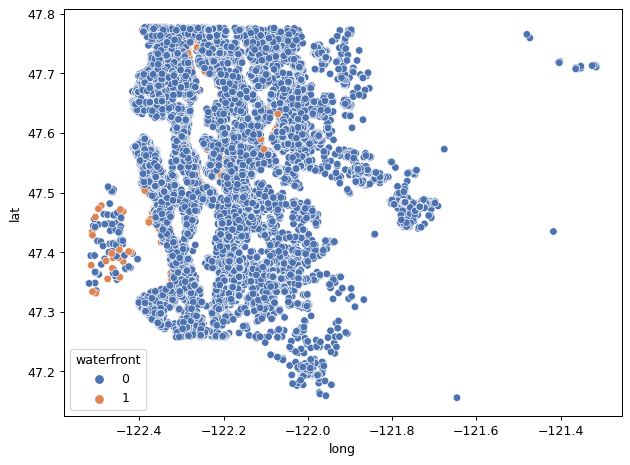

In [195]:
resizeplot(8,6,90)
sns.scatterplot(x='long',y='lat',data=df,hue='waterfront',palette='deep')

#### Poucos imóveis a beira-mar mas vamos olhar pela perspectiva de valores.

In [196]:
perc = df.sort_values('price',ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

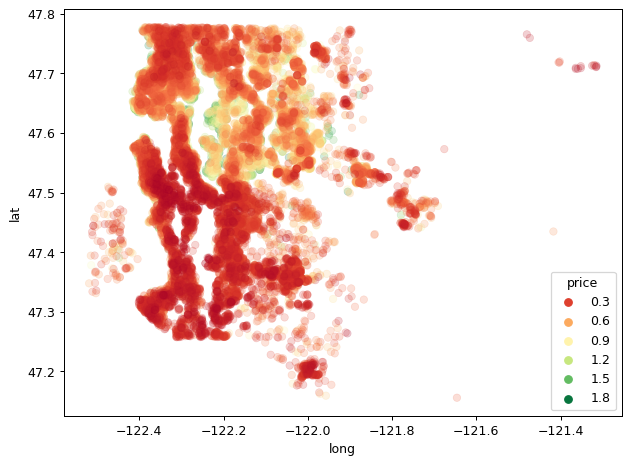

In [198]:
resizeplot(8,6,90)
sns.scatterplot(x='long',y='lat',
                data=perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)

#### Hummm, os imóveis de maior valor encontram-se no meio do estado. Faz sentido, são casas que ficam próximas ao Lake Washington.

#### Abaixo podemos verificar valores crescentes proporcionamente ao número de andares, quartos e banheiros. 

In [199]:
df[['bedrooms','bathrooms','floors']].groupby(df['price']).mean()

bedrooms  bathrooms  floors
price                                 
75000.0         1.0        0.0     1.0
78000.0         2.0        1.0     1.0
80000.0         1.0        0.0     1.0
81000.0         2.0        1.0     1.0
82000.0         3.0        1.0     1.0
...             ...        ...     ...
3075000.0       4.0        5.0     1.0
3100000.0       5.0        5.0     2.0
3300000.0       5.0        6.0     2.0
3418800.0       5.0        5.0     2.0
3635000.0       5.0        6.0     2.0

[3989 rows x 3 columns]

#### Na visualização abaixo, a distribuição dos valores dos imóveis.

<AxesSubplot:xlabel='price', ylabel='Count'>

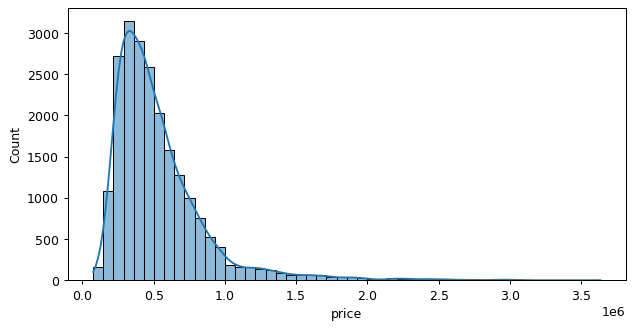

In [210]:
resizeplot(8,4,90)
sns.histplot(x='price',data=df,stat='count',bins=50,kde=True)

#### Uma visualização de mais parâmetros com relação ao preço dos imóveis. Olhamos o grade x price, quanto maior o grade maior o valor, o que faz sentido pois quanto maior a qualidade e o nível do projeto do imóvel, mais valorizado fica.
#### Lembrando que os pontos mais claros se referem aos imóveis a "beira-mar" ou "beira-lago".

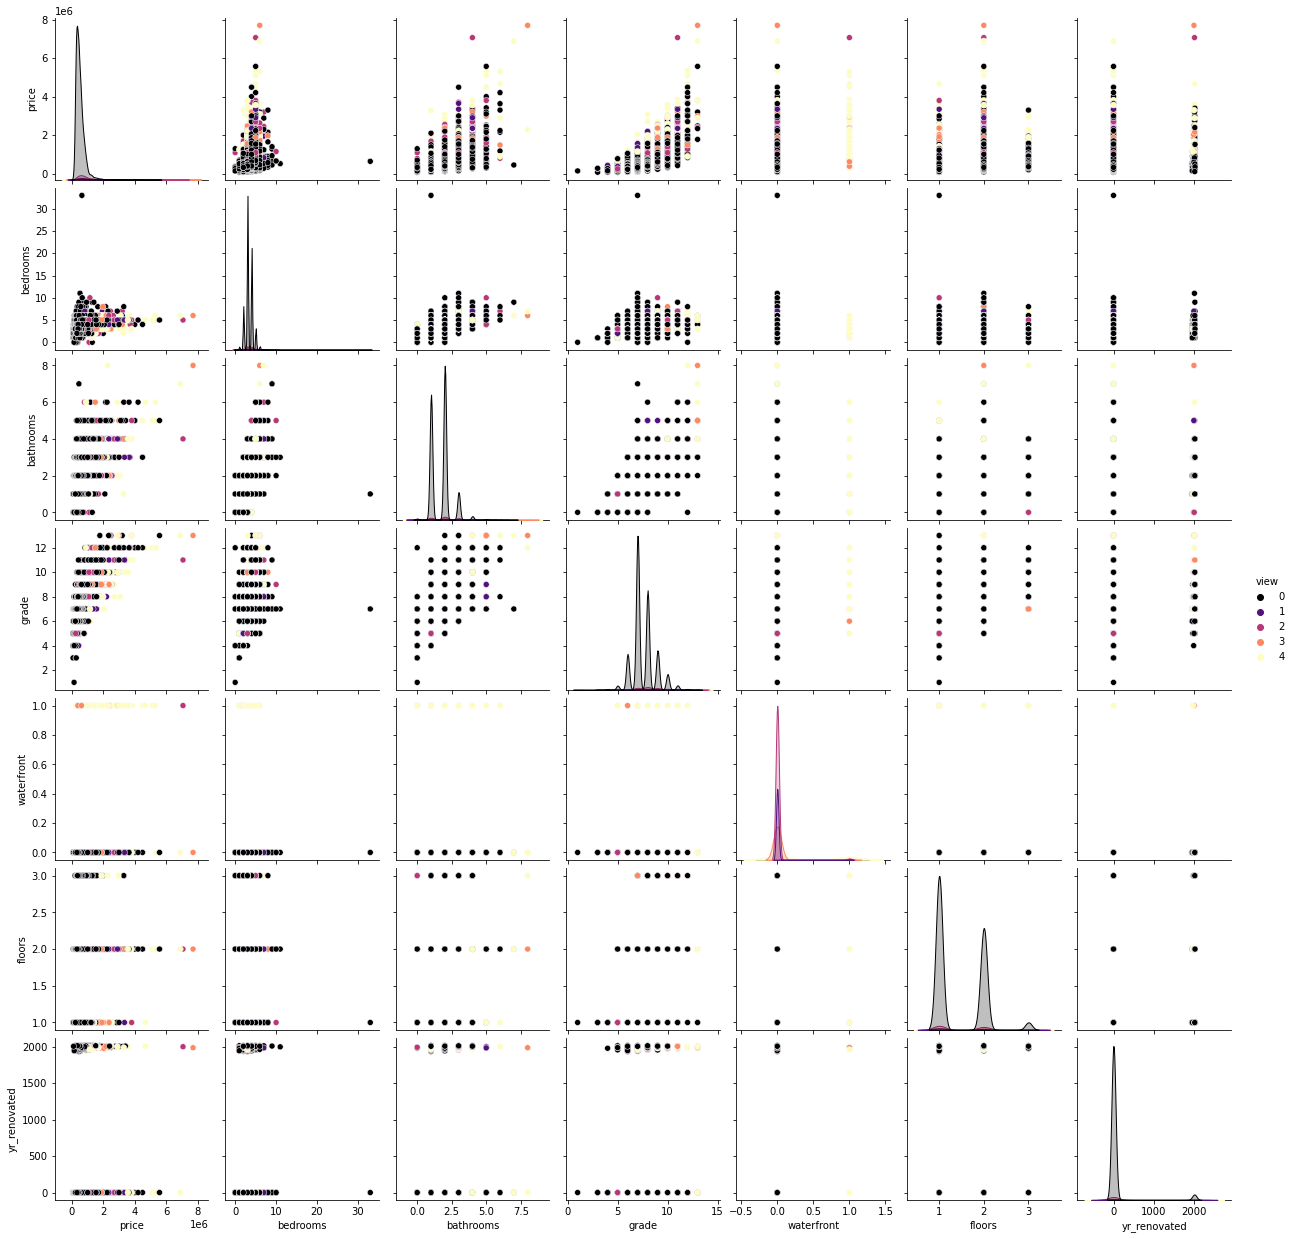

In [148]:
corre = df[['price','bedrooms','bathrooms','grade','waterfront','floors','view','yr_renovated']]
sns.pairplot(corre,hue='view',palette='magma')

#### Como os dados não me trazem de quais cidades estamos lidando, apenas o zipcode, vamos convetê-los de maneira nominal, ou seja, descobriremos sobre quais cidades estamos falando.

In [97]:
from uszipcode import SearchEngine
engine=SearchEngine()
df['city'] = df['zipcode'].map(lambda x:engine.by_zipcode(x).major_city)

In [98]:
df.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3          1         1180   
1  6414100192 2014-12-09  538000.0         3          2         2570   
2  5631500400 2015-02-25  180000.0         2          1          770   
3  2487200875 2014-12-09  604000.0         4          3         1960   
4  1954400510 2015-02-18  510000.0         3          2         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650       1           0     0  ...        1180              0   
1      7242       2           0     0  ...        2170            400   
2     10000       1           0     0  ...         770              0   
3      5000       1           0     0  ...        1050            910   
4      8080       1           0     0  ...        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15       city  
0        5650    Seattle  
1        7639    Seattle  
2        8062    Kenmore  
3        5000    Seattle  
4        7503  Sammamish  

[5 rows x 22 columns]

#### Ótimo, vejamos as cidades mais valorizadas.

<AxesSubplot:xlabel='price', ylabel='city'>

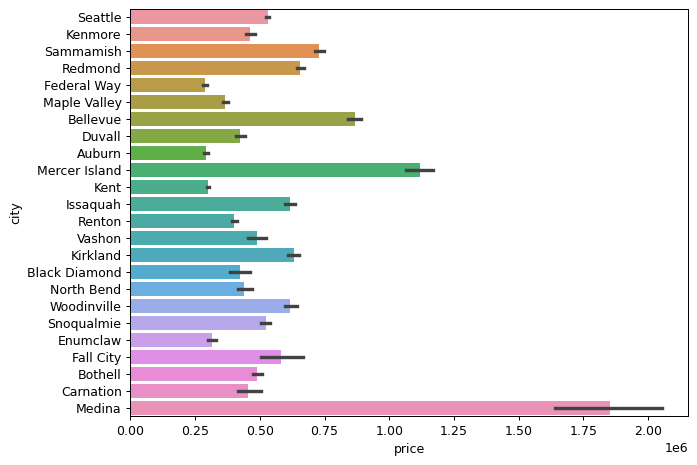

In [71]:
resizeplot(8,6,90)
sns.barplot(x='price',y='city',data=df,estimator=np.mean)

In [149]:
#df[['grade','price','sqft_living']].groupby('grade').mean()

#### Fazemos uma contagem para os imóveis que foram reformados.

In [74]:
df['yr_renovated'].value_counts()

0       20646
2014       91
2013       37
2005       35
2007       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

#### E por último e não menos importante. Mapa de calor correlacional.

<AxesSubplot:>

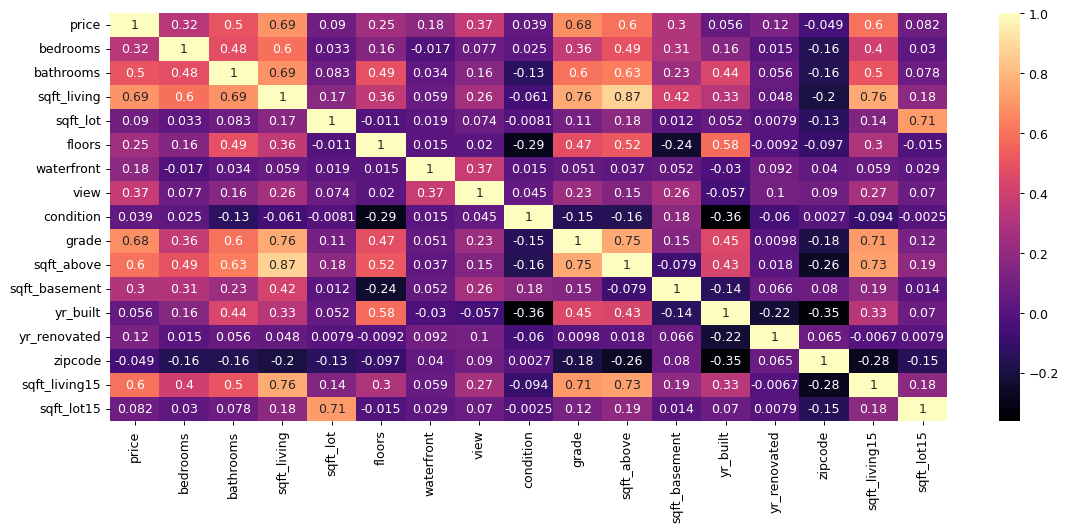

In [75]:
resizeplot(15,6,90)
corre = df.drop(['id','date','city','lat','long'],axis=1)
sns.heatmap(corre.corr(),cmap='magma',annot=True)

##### Poucas features correlacionadas, o que nos leva a considerar que alguns modelos como Linear Regression não trará bons frutos. Vejamos.

In [ ]:
#CRIAR OS MODELOS

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21549 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21549 non-null  int64         
 1   date           21549 non-null  datetime64[ns]
 2   price          21549 non-null  float64       
 3   bedrooms       21549 non-null  int64         
 4   bathrooms      21549 non-null  int64         
 5   sqft_living    21549 non-null  int64         
 6   sqft_lot       21549 non-null  int64         
 7   floors         21549 non-null  int64         
 8   waterfront     21549 non-null  int64         
 9   view           21549 non-null  int64         
 10  condition      21549 non-null  int64         
 11  grade          21549 non-null  int64         
 12  sqft_above     21549 non-null  int64         
 13  sqft_basement  21549 non-null  int64         
 14  yr_built       21549 non-null  int64         
 15  yr_renovated   2154

#### Separamos os dados em treino e teste.

In [201]:
X = df.iloc[:,3:21]
y= df['price']

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [203]:
std = StandardScaler()
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

In [124]:
#LINEAR REGRESSION

#### Um modelo linear faz uma previsão simplesmente computando uma soma ponderada dos recursos de entrada, mais uma constante chamada de termo de polarização (também chamado de termo de interceptação),

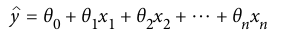

In [125]:
lr = LinearRegression()
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)

MAE_lr = mean_absolute_error(y_test,pred_lr)
MSE_lr = mean_squared_error(y_test,pred_lr)
RMSE_lr = np.sqrt(MSE_lr)
R2_lr = r2_score(y_test,pred_lr)

print('MAE: ', MAE_lr)
print('MSE: ', MSE_lr)
print('RMSE: ', RMSE_lr)
print('R2_SCORE :', R2_lr)

MAE:  118768.29965080447
MSE:  33119037546.795574
RMSE:  181986.3663761535
R2_SCORE : 0.7016528256685954


#### Conforme previsto, não ta legal. "Variância " e "desvio padrão" bem altos, além do modelo não ter ido bem. Seguimos.

In [82]:
#ELASTIC NET

#### O Elastic Net é um meio termo entre Ridge Regression e Lasso Regression. O termo de regularização é uma mistura simples dos termos de regularização de Ridge e Lasso, e você pode controlar a proporção de mistura r. Quando r = 0, Elastic Net é equivalente a Ridge Regression, e quando r = 1, é equivalente a Lasso Regression.

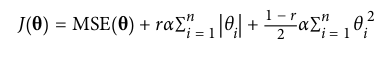

In [83]:
en = ElasticNet()
param_grid_en = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}
grid_model_en = GridSearchCV(estimator=en,param_grid=param_grid_en,
                          scoring='neg_mean_squared_error', cv=5, verbose=2)

grid_model_en.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.119e+11, tolerance: 1.298e+11

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.485e+11, tolerance: 1.279e+11



[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.2s
[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.2s


/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.877e+11, tolerance: 1.259e+11

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.660e+11, tolerance: 1.289e+11



[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.2s
[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.2s


/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.637e+11, tolerance: 1.305e+11

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.880e+14, tolerance: 1.298e+11



[CV] END ...........................alpha=0.1, l1_ratio=0.95; total time=   0.2s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.1s


/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.840e+14, tolerance: 1.279e+11

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.820e+14, tolerance: 1.259e+11



[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s
[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.858e+14, tolerance: 1.289e+11



[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.896e+14, tolerance: 1.305e+11



[CV] END ...........................alpha=0.1, l1_ratio=0.99; total time=   0.2s


/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.038e+13, tolerance: 1.298e+11



[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+13, tolerance: 1.279e+11



[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s


/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.017e+13, tolerance: 1.259e+11



[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s


/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.104e+13, tolerance: 1.289e+11

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.112e+13, tolerance: 1.305e+11



[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.3s
[CV] END ..............................alpha=0.1, l1_ratio=1; total time=   0.2s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=1, l1_ratio=0.5; total time=   0.0s
[CV] END ...................

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.039e+13, tolerance: 1.298e+11



[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s


/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.069e+13, tolerance: 1.279e+11



[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s


/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.018e+13, tolerance: 1.259e+11



[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s


/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.105e+13, tolerance: 1.289e+11



[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s


/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.113e+13, tolerance: 1.305e+11



[CV] END ................................alpha=1, l1_ratio=1; total time=   0.2s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.1; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.5; total time=   0.0s
[CV] END ..............................alpha=5, l1_ratio=0.7; total time=   0.0s
[CV] END ...................

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.043e+13, tolerance: 1.298e+11

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.072e+13, tolerance: 1.279e+11



[CV] END ................................alpha=5, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=5, l1_ratio=1; total time=   0.2s


/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.021e+13, tolerance: 1.259e+11

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.108e+13, tolerance: 1.289e+11



[CV] END ................................alpha=5, l1_ratio=1; total time=   0.2s
[CV] END ................................alpha=5, l1_ratio=1; total time=   0.2s


/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.116e+13, tolerance: 1.305e+11



[CV] END ................................alpha=5, l1_ratio=1; total time=   0.2s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=10, l1_ratio=0.7; total time=   0.0s
[CV] END ...................

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.047e+13, tolerance: 1.298e+11

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.076e+13, tolerance: 1.279e+11



[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.2s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.1s


/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.025e+13, tolerance: 1.259e+11

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.113e+13, tolerance: 1.289e+11



[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.2s
[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.1s


/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.120e+13, tolerance: 1.305e+11



[CV] END ...............................alpha=10, l1_ratio=1; total time=   0.2s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.1; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.5; total time=   0.0s
[CV] END .............................alpha=50, l1_ratio=0.7; total time=   0.0s
[CV] END ...................

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.131e+11, tolerance: 1.298e+11

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.005e+11, tolerance: 1.279e+11



[CV] END ...............................alpha=50, l1_ratio=1; total time=   0.2s
[CV] END ...............................alpha=50, l1_ratio=1; total time=   0.1s


/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.378e+11, tolerance: 1.259e+11

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.124e+11, tolerance: 1.289e+11



[CV] END ...............................alpha=50, l1_ratio=1; total time=   0.2s
[CV] END ...............................alpha=50, l1_ratio=1; total time=   0.1s


/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.323e+11, tolerance: 1.305e+11



[CV] END ...............................alpha=50, l1_ratio=1; total time=   0.2s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=100, l1_ratio=0.7; total time=   0.0s
[CV] END ...................

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.325e+14, tolerance: 1.608e+11



GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [84]:
grid_model_en.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.99)

In [85]:
grid_model_en.best_params_

{'alpha': 0.1, 'l1_ratio': 0.99}

In [86]:
pred_en = grid_model_en.predict(X_test)

In [87]:
MAE_en = mean_absolute_error(y_test,pred_en)
MSE_en = mean_squared_error(y_test,pred_en)
RMSE_en = np.sqrt(MSE_en)
R2_en = r2_score(y_test,pred_en)


print('MAE: ', MAE_en)
print('MSE: ', MSE_en)
print('RMSE: ', RMSE_en)
print('R2_SCORE: ',R2_en)

MAE:  118744.04074986883
MSE:  33119277905.889324
RMSE:  181987.0267516048
R2_SCORE:  0.7016506604348882


#### Pode ser melhor.

In [90]:
#XGBREGRESSOR

#### O XGBoost é uma implementação de árvores de decisão impulsionadas por gradiente projetadas para velocidade e desempenho. Ou seja, são as árvores de decisão com esteróides. Tende a dar bons resultados.

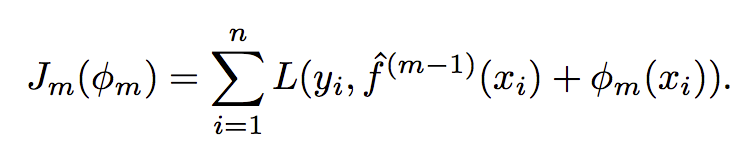

In [95]:
xgb =XGBRegressor()
param_grid_xgb = {'n_estimators':[1000],'max_depth':[2,5,10],'subsample':[0.5,0.7],
                 'colsample_bytree':[0.5],'alpha':[0.05, 0.1, 0.2, 0.3, 0.5]}
grid_model_xgb = GridSearchCV(estimator=xgb,param_grid=param_grid_xgb,
                              scoring='neg_mean_squared_error', cv=5, verbose=1,n_jobs=-1)
grid_model_xgb.fit(X_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWar

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                 

In [96]:
grid_model_xgb.best_params_

{'alpha': 0.3,
 'colsample_bytree': 0.5,
 'max_depth': 2,
 'n_estimators': 1000,
 'subsample': 0.7}

In [98]:
grid_model_xgb.best_estimator_

XGBRegressor(alpha=0.3, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.300000012, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [111]:
pred_xgb = grid_model_xgb.predict(X_test)

MAE_xgb = mean_absolute_error(y_test,pred_xgb)
MSE_xgb = mean_squared_error(y_test,pred_xgb)
RMSE_xgb = np.sqrt(MSE_xgb)
R2_xgb = r2_score(y_test,pred_xgb)


print('MAE: ', MAE_xgb)
print('MSE: ', MSE_xgb)
print('RMSE: ', RMSE_xgb)
print('R2_SCORE:',R2_xgb)

MAE:  71424.55870794663
MSE:  13496228363.015589
RMSE:  116173.2687110748
R2_SCORE: 0.8784215395586986


#### Bem melhor, seguimos.

In [101]:
#SVR

#### Uma Support Vector Machine (SVM) é um modelo de Machine Learning muito poderoso e versátil, capaz de realizar classificação linear ou não linear, regressão e até detecção de valores discrepantes.

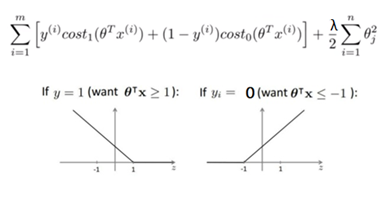

In [204]:
svr = SVR()
param_grid_svr = {'C':[0.01,0.1,0.5,1],'kernel':['linear','rbf','poly'],
                 'gamma':['scale','auto'],'degree':[2,3,4],'epsilon':[0,0.01,0.5,1]}
grid_model_svr = GridSearchCV(estimator=svr,param_grid=param_grid_svr,
                              scoring='neg_mean_squared_error', cv=5, verbose=1,n_jobs=-1)
grid_model_svr.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.5, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error', verbose=1)

In [205]:
grid_model_svr.best_estimator_

SVR(C=1, degree=2, epsilon=0, kernel='linear')

In [206]:
grid_model_svr.best_params_

{'C': 1, 'degree': 2, 'epsilon': 0, 'gamma': 'scale', 'kernel': 'linear'}

In [207]:
pred_svr = grid_model_svr.predict(X_test)

MAE_svr = mean_absolute_error(y_test,pred_svr)
MSE_svr = mean_squared_error(y_test,pred_svr)
RMSE_svr = np.sqrt(MSE_svr)
R2_svr = r2_score(y_test,pred_svr)


print('MAE: ', MAE_svr)
print('MSE: ', MSE_svr)
print('RMSE: ', RMSE_svr)
print('R2_SCORE:',R2_svr)

MAE:  198219.51250774253
MSE:  101545035642.01797
RMSE:  318661.3180824086
R2_SCORE: 0.08524894757670609


#### Pode ser melhor.

In [117]:
# KNEIGHBORS REGRESSOR

#### O algoritmo de k-vizinhos mais próximos, também conhecido como KNN ou k-NN, é um classificador de aprendizado supervisionado não paramétrico, que usa a proximidade para fazer classificações ou previsões sobre o agrupamento de um ponto de dados individual. Essas medidas de proximidades podem ser medidas pela Distância Euclidiana, Manhattan, Minkowski ou Hamming. Abaixo as funções das mais utilizadas:

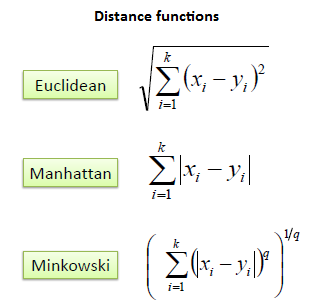

In [127]:
knr = KNeighborsRegressor()
param_grid_knr = {'n_neighbors':[5,10,15],'weights':['uniform','distance'],'algorithm':['auto','brute','bal_tree'],
                 'leaf_size':[30,40,45,50]}
grid_model_knr = GridSearchCV(knr,param_grid_knr,verbose=2,cv=5,n_jobs=-1,scoring='neg_mean_squared_error')

grid_model_knr.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END algorithm=auto, leaf_size=30, n_neighbors=5, weights=uniform; total time=   1.2s
[CV] END algorithm=auto, leaf_size=30, n_neighbors=5, weights=distance; total time=   1.1s
[CV] END algorithm=auto, leaf_size=30, n_neighbors=5, weights=distance; total time=   1.2s
[CV] END algorithm=auto, leaf_size=30, n_neighbors=10, weights=uniform; total time=   1.0s
[CV] END algorithm=auto, leaf_size=30, n_neighbors=10, weights=distance; total time=   1.1s
[CV] END algorithm=auto, leaf_size=30, n_neighbors=15, weights=uniform; total time=   1.0s
[CV] END algorithm=auto, leaf_size=30, n_neighbors=15, weights=uniform; total time=   1.0s
[CV] END algorithm=auto, leaf_size=30, n_neighbors=15, weights=distance; total time=   0.9s
[CV] END algorithm=auto, leaf_size=40, n_neighbors=5, weights=uniform; total time=   0.9s
[CV] END algorithm=auto, leaf_size=40, n_neighbors=5, weights=distance; total time=   0.9s
[CV] END algorithm=auto, lea

[CV] END algorithm=auto, leaf_size=30, n_neighbors=5, weights=uniform; total time=   1.2s
[CV] END algorithm=auto, leaf_size=30, n_neighbors=5, weights=distance; total time=   1.5s
[CV] END algorithm=auto, leaf_size=30, n_neighbors=10, weights=uniform; total time=   1.1s
[CV] END algorithm=auto, leaf_size=30, n_neighbors=10, weights=distance; total time=   1.0s
[CV] END algorithm=auto, leaf_size=30, n_neighbors=10, weights=distance; total time=   1.1s
[CV] END algorithm=auto, leaf_size=30, n_neighbors=15, weights=uniform; total time=   1.1s
[CV] END algorithm=auto, leaf_size=30, n_neighbors=15, weights=distance; total time=   1.0s
[CV] END algorithm=auto, leaf_size=40, n_neighbors=5, weights=uniform; total time=   1.0s
[CV] END algorithm=auto, leaf_size=40, n_neighbors=5, weights=distance; total time=   1.0s
[CV] END algorithm=auto, leaf_size=40, n_neighbors=5, weights=distance; total time=   1.0s
[CV] END algorithm=auto, leaf_size=40, n_neighbors=10, weights=uniform; total time=   1.0

[CV] END algorithm=auto, leaf_size=30, n_neighbors=5, weights=uniform; total time=   1.1s
[CV] END algorithm=auto, leaf_size=30, n_neighbors=5, weights=uniform; total time=   1.1s
[CV] END algorithm=auto, leaf_size=30, n_neighbors=5, weights=distance; total time=   1.2s
[CV] END algorithm=auto, leaf_size=30, n_neighbors=10, weights=uniform; total time=   1.2s
[CV] END algorithm=auto, leaf_size=30, n_neighbors=10, weights=distance; total time=   1.0s
[CV] END algorithm=auto, leaf_size=30, n_neighbors=15, weights=uniform; total time=   1.1s
[CV] END algorithm=auto, leaf_size=30, n_neighbors=15, weights=distance; total time=   1.1s
[CV] END algorithm=auto, leaf_size=30, n_neighbors=15, weights=distance; total time=   1.0s
[CV] END algorithm=auto, leaf_size=40, n_neighbors=5, weights=uniform; total time=   1.1s
[CV] END algorithm=auto, leaf_size=40, n_neighbors=5, weights=distance; total time=   1.3s
[CV] END algorithm=auto, leaf_size=40, n_neighbors=10, weights=uniform; total time=   1.1s

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neighbors/_regression.py", line 213, in fit
    return self._fit(X, y)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'brute', 'bal_tree'],
                         'leaf_size': [30, 40, 45, 50],
                         'n_neighbors': [5, 10, 15],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error', verbose=2)

In [128]:
grid_model_knr.best_estimator_

KNeighborsRegressor(n_neighbors=10, weights='distance')

In [129]:
grid_model_knr.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'n_neighbors': 10,
 'weights': 'distance'}

In [130]:
pred_knr = grid_model_knr.predict(X_test)

MAE_knr = mean_absolute_error(y_test,pred_knr)
MSE_knr = mean_squared_error(y_test,pred_knr)
RMSE_knr = np.sqrt(MSE_knr)
R2_knr = r2_score(y_test,pred_knr)


print('MAE: ', MAE_knr)
print('MSE: ', MSE_knr)
print('RMSE: ', RMSE_knr)
print('R2_SCORE:',R2_knr)

MAE:  85563.2455947783
MSE:  21665270003.127007
RMSE:  147191.27013218892
R2_SCORE: 0.804832127822951


#### Até agora, o segundo melhor. Seguimos.

In [131]:
#RANDOM FOREST REGRESSOR

#### As árvores de decisão são classificadores atraentes devido à sua alta velocidade de execução. Mas as árvores derivadas com métodos tradicionais geralmente não podem ser cultivadas até uma complexidade arbitrária para possível perda de precisão de generalização em dados não vistos. A limitação na complexidade geralmente significa precisão abaixo do ideal nos dados de treinamento. A essência do método é construir múltiplas árvores em subespaços selecionados aleatoriamente do espaço de características.

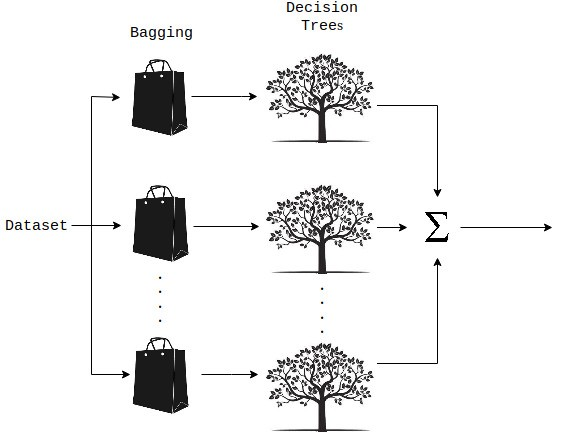

In [92]:
rfr = RandomForestRegressor()
param_grid_rfr = {'n_estimators':[100,200,300],'criterion':['squared_error','absolute_error'],
                 'max_features':['sqrt','log2'],'max_leaf_nodes':[10,20,50]}
grid_model_rfr = GridSearchCV(rfr,param_grid_rfr,scoring='neg_mean_squared_error',verbose=2,n_jobs=-1,cv=5)

grid_model_rfr.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [10, 20, 50],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [93]:
grid_model_rfr.best_estimator_

RandomForestRegressor(max_features='log2', max_leaf_nodes=50, n_estimators=300)

In [94]:
grid_model_rfr.best_params_

{'criterion': 'squared_error',
 'max_features': 'log2',
 'max_leaf_nodes': 50,
 'n_estimators': 300}

In [95]:
pred_rfr = grid_model_rfr.predict(X_test)

MAE_rfr = mean_absolute_error(y_test,pred_rfr)
MSE_rfr = mean_squared_error(y_test,pred_rfr)
RMSE_rfr = np.sqrt(MSE_rfr)
R2_rfr = r2_score(y_test,pred_rfr)


print('MAE: ', MAE_rfr)
print('MSE: ', MSE_rfr)
print('RMSE: ', RMSE_rfr)
print('R2_SCORE:',R2_rfr)

MAE:  95769.8517886211
MSE:  22204974751.726673
RMSE:  149013.33749610023
R2_SCORE: 0.7999702900811254
[CV] END criterion=squared_error, max_features=sqrt, max_leaf_nodes=10, n_estimators=100; total time=   1.1s
[CV] END criterion=squared_error, max_features=sqrt, max_leaf_nodes=10, n_estimators=100; total time=   1.1s
[CV] END criterion=squared_error, max_features=sqrt, max_leaf_nodes=10, n_estimators=200; total time=   2.1s
[CV] END criterion=squared_error, max_features=sqrt, max_leaf_nodes=10, n_estimators=300; total time=   3.5s
[CV] END criterion=squared_error, max_features=sqrt, max_leaf_nodes=20, n_estimators=100; total time=   1.3s
[CV] END criterion=squared_error, max_features=sqrt, max_leaf_nodes=20, n_estimators=100; total time=   1.3s
[CV] END criterion=squared_error, max_features=sqrt, max_leaf_nodes=20, n_estimators=200; total time=   2.6s
[CV] END criterion=squared_error, max_features=sqrt, max_leaf_nodes=20, n_estimators=300; total time=   3.9s
[CV] END criterion=square

[CV] END criterion=squared_error, max_features=sqrt, max_leaf_nodes=10, n_estimators=100; total time=   1.1s
[CV] END criterion=squared_error, max_features=sqrt, max_leaf_nodes=10, n_estimators=200; total time=   2.2s
[CV] END criterion=squared_error, max_features=sqrt, max_leaf_nodes=10, n_estimators=300; total time=   3.7s
[CV] END criterion=squared_error, max_features=sqrt, max_leaf_nodes=20, n_estimators=100; total time=   1.3s
[CV] END criterion=squared_error, max_features=sqrt, max_leaf_nodes=20, n_estimators=100; total time=   1.3s
[CV] END criterion=squared_error, max_features=sqrt, max_leaf_nodes=20, n_estimators=200; total time=   2.6s
[CV] END criterion=squared_error, max_features=sqrt, max_leaf_nodes=20, n_estimators=200; total time=   2.6s
[CV] END criterion=squared_error, max_features=sqrt, max_leaf_nodes=20, n_estimators=300; total time=   3.8s
[CV] END criterion=squared_error, max_features=sqrt, max_leaf_nodes=50, n_estimators=100; total time=   1.5s
[CV] END criterion=

#### Nos trouxe um resultado menor que o esperado. Abaixo fiz um teste com Cross val score mas não trouxe nenhuma novidade.

In [144]:
#CROSS VALIDATION RFR

In [172]:
rfr_cv = RandomForestRegressor(criterion= 'squared_error',max_features= 'log2',max_leaf_nodes= 20,
                               n_estimators= 200)

In [173]:
score_rfr = cross_val_score(rfr_cv,X_train,y_train,cv=5,scoring='neg_mean_squared_error',verbose=1,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.8s finished


In [174]:
score_rfr

array([-2.66011695e+10, -2.89095662e+10, -3.14025026e+10, -2.73568712e+10,
       -2.54149153e+10])

In [175]:
abs(score_rfr.mean())

27937004958.229065

In [160]:
#REDES NEURAIS

#### As redes neurais artificiais (RNAs) são compostas por camadas de nós, contendo uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. Cada nó, ou neurônio artificial, conecta-se a outro e tem um peso e um limiar associados. Se a saída de qualquer nó individual estiver acima do valor limite especificado, esse nó é ativado, enviando dados para a próxima camada da rede. Caso contrário, nenhum dado é passado para a próxima camada da rede.

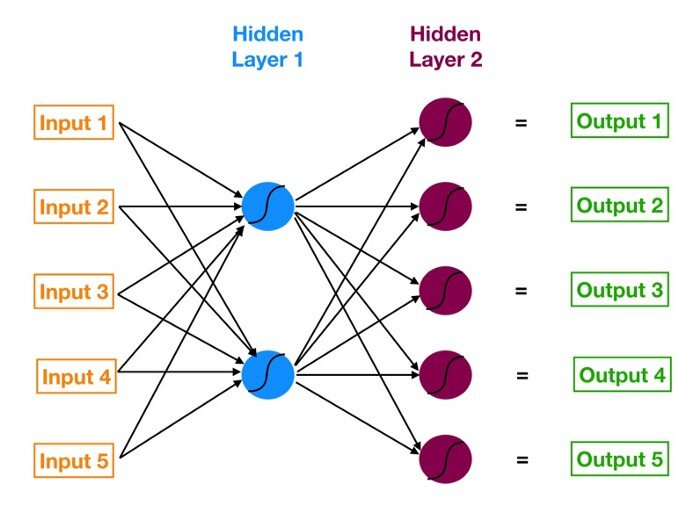

In [182]:
X_test.shape

(6465, 18)

In [184]:
mlpr = MLPRegressor()
param_grid_mlpr = {'activation':['identity','logistic','relu'],'solver':['lbfgs', 'sgd', 'adam'],
             'learning_rate':['constant','invscaling','adaptive'],'max_iter':[200,400],
             'hidden_layer_sizes':[4,4]}
model_grid_mlpr = GridSearchCV(mlpr,param_grid_mlpr,verbose=2,n_jobs=-1,cv=5)

model_grid_mlpr.fit(X_train,y_train)

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packa

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/util

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/util

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeW

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=200, solver=sgd; total time=   6.8s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=200, solver=adam; total time=   7.0s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=200, solver=adam; total time=   7.3s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=400, solver=sgd; total time=  12.2s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=400, solver=adam; total time=  13.8s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=invscaling, max_iter=200, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=invscaling, max_iter=200, solver=lbfgs; total time=   0.1s
[CV] END activation

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) 

[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=200, solver=sgd; total time=   6.3s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=200, solver=sgd; total time=   5.8s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=400, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=400, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=400, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=400, solver=lbfgs; total time=   0.1s
[CV] END activation=

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_mult

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/a

[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=200, solver=sgd; total time=   6.5s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=200, solver=adam; total time=   7.6s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=200, solver=adam; total time=   7.3s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=400, solver=adam; total time=  14.5s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=400, solver=adam; total time=  13.7s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=invscaling, max_iter=200, solver=sgd; total time=   6.0s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=invscaling, max_iter=200, solver=adam; total time=   6.9s
[CV] END activation=i

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_mult

[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=200, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=200, solver=sgd; total time=   7.2s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=200, solver=adam; total time=   7.6s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=400, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=400, solver=sgd; total time=  12.9s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=400, solver=sgd; total time=  12.2s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=constant, max_iter=400, solver=adam; total time=  13.3s
[CV] END activation=identity, hidden_layer_sizes=4, learning_rate=invscaling, max_iter=200, solver=sgd; total time=   5.7s
[CV] END activation=iden

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/italosimoes/a

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/a

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum i

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum i

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/ho

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) 

[CV] END activation=logistic, hidden_layer_sizes=4, learning_rate=invscaling, max_iter=200, solver=adam; total time=   7.0s
[CV] END activation=logistic, hidden_layer_sizes=4, learning_rate=invscaling, max_iter=400, solver=lbfgs; total time=   4.2s
[CV] END activation=logistic, hidden_layer_sizes=4, learning_rate=invscaling, max_iter=400, solver=sgd; total time=  13.2s
[CV] END activation=logistic, hidden_layer_sizes=4, learning_rate=invscaling, max_iter=400, solver=adam; total time=  14.6s
[CV] END activation=logistic, hidden_layer_sizes=4, learning_rate=adaptive, max_iter=200, solver=lbfgs; total time=   2.0s
[CV] END activation=logistic, hidden_layer_sizes=4, learning_rate=adaptive, max_iter=200, solver=lbfgs; total time=   1.8s
[CV] END activation=logistic, hidden_layer_sizes=4, learning_rate=adaptive, max_iter=200, solver=sgd; total time=   7.0s
[CV] END activation=logistic, hidden_layer_sizes=4, learning_rate=adaptive, max_iter=200, solver=sgd; total time=   5.6s
[CV] END activat

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or sca

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum i

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/s

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

[CV] END activation=logistic, hidden_layer_sizes=4, learning_rate=adaptive, max_iter=200, solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, hidden_layer_sizes=4, learning_rate=adaptive, max_iter=200, solver=lbfgs; total time=   1.9s
[CV] END activation=logistic, hidden_layer_sizes=4, learning_rate=adaptive, max_iter=200, solver=lbfgs; total time=   1.7s
[CV] END activation=logistic, hidden_layer_sizes=4, learning_rate=adaptive, max_iter=200, solver=sgd; total time=   6.7s
[CV] END activation=logistic, hidden_layer_sizes=4, learning_rate=adaptive, max_iter=200, solver=sgd; total time=   6.4s
[CV] END activation=logistic, hidden_layer_sizes=4, learning_rate=adaptive, max_iter=200, solver=adam; total time=   7.5s
[CV] END activation=logistic, hidden_layer_sizes=4, learning_rate=adaptive, max_iter=400, solver=lbfgs; total time=   2.4s
[CV] END activation=logistic, hidden_layer_sizes=4, learning_rate=adaptive, max_iter=400, solver=lbfgs; total time=   3.8s
[CV] END activation=l

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9

/home/italosimoes/anaconda3/envs/Machine_Learning/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



GridSearchCV(cv=5, estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'relu'],
                         'hidden_layer_sizes': [4, 4],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'max_iter': [200, 400],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             verbose=2)

In [188]:
pred_mlpr = model_grid_mlpr.predict(X_test)

MAE_mlpr = mean_absolute_error(y_test,pred_mlpr)
MSE_mlpr = mean_squared_error(y_test,pred_mlpr)
RMSE_mlpr = np.sqrt(MSE_mlpr)
R2_mlpr = r2_score(y_test,pred_mlpr)


print('MAE: ', MAE_mlpr)
print('MSE: ', MSE_mlpr)
print('RMSE: ', RMSE_mlpr)
print('R2_SCORE:',R2_mlpr)

MAE:  101492.67616144454
MSE:  24562731042.82591
RMSE:  156725.0172844971
R2_SCORE: 0.7787308465671755


#### Nada bem. Seguimos as redes neurais, agora com TensorFlow.

In [ ]:
#TENSOR FLOW

In [201]:
model = Sequential()

model.add(Dense(18,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')
model.fit(x=X_train,y=y_train, validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
118/118 [==============================] - 2s 10ms/step - loss: 386656436499.3613 - val_loss: 398270529536.0000
Epoch 2/400
118/118 [==============================] - 1s 7ms/step - loss: 398213485955.2269 - val_loss: 395947409408.0000
Epoch 3/400
118/118 [==============================] - 1s 7ms/step - loss: 387048113229.4454 - val_loss: 370181210112.0000
Epoch 4/400
118/118 [==============================] - 1s 8ms/step - loss: 333446301162.4874 - val_loss: 271526789120.0000
Epoch 5/400
118/118 [==============================] - 1s 7ms/step - loss: 225694292019.6302 - val_loss: 135726964736.0000
Epoch 6/400
118/118 [==============================] - 1s 6ms/step - loss: 111879093721.2773 - val_loss: 88422449152.0000
Epoch 7/400
118/118 [==============================] - 1s 9ms/step - loss: 78565201627.4286 - val_loss: 73358090240.0000
Epoch 8/400
118/118 [==============================] - 1s 9ms/step - loss: 68318629750.3193 - val_loss: 65078865920.0000
Epoch 9/400
118/118 

118/118 [==============================] - 1s 7ms/step - loss: 23740674237.3109 - val_loss: 27030923264.0000
Epoch 69/400
118/118 [==============================] - 1s 6ms/step - loss: 25119931366.1849 - val_loss: 27011825664.0000
Epoch 70/400
118/118 [==============================] - 1s 7ms/step - loss: 24019883223.1260 - val_loss: 26968541184.0000
Epoch 71/400
118/118 [==============================] - 1s 7ms/step - loss: 25092612681.1429 - val_loss: 26951651328.0000
Epoch 72/400
118/118 [==============================] - 1s 8ms/step - loss: 24871778269.5798 - val_loss: 26917816320.0000
Epoch 73/400
118/118 [==============================] - 1s 8ms/step - loss: 25796949534.1176 - val_loss: 26889197568.0000
Epoch 74/400
118/118 [==============================] - 1s 7ms/step - loss: 25592597874.0168 - val_loss: 26874417152.0000
Epoch 75/400
118/118 [==============================] - 1s 9ms/step - loss: 24340363177.9496 - val_loss: 26804238336.0000
Epoch 76/400
118/118 [===============

Epoch 135/400
118/118 [==============================] - 1s 8ms/step - loss: 24176953085.8487 - val_loss: 25473251328.0000
Epoch 136/400
118/118 [==============================] - 1s 6ms/step - loss: 23238240118.3193 - val_loss: 25472624640.0000
Epoch 137/400
118/118 [==============================] - 1s 7ms/step - loss: 23597552545.3445 - val_loss: 25440339968.0000
Epoch 138/400
118/118 [==============================] - 1s 7ms/step - loss: 24207005420.6387 - val_loss: 25453565952.0000
Epoch 139/400
118/118 [==============================] - 1s 8ms/step - loss: 24116648641.6134 - val_loss: 25403590656.0000
Epoch 140/400
118/118 [==============================] - 1s 8ms/step - loss: 23268920294.1849 - val_loss: 25407375360.0000
Epoch 141/400
118/118 [==============================] - 1s 8ms/step - loss: 22511040804.5714 - val_loss: 25405118464.0000
Epoch 142/400
118/118 [==============================] - 1s 7ms/step - loss: 24963223758.5210 - val_loss: 25382371328.0000
Epoch 143/400
11

118/118 [==============================] - 1s 7ms/step - loss: 21673647990.3193 - val_loss: 24533252096.0000
Epoch 268/400
118/118 [==============================] - 1s 9ms/step - loss: 21746493646.5210 - val_loss: 24523079680.0000
Epoch 269/400
118/118 [==============================] - 1s 10ms/step - loss: 22157873134.7899 - val_loss: 24519620608.0000
Epoch 270/400
118/118 [==============================] - 1s 12ms/step - loss: 23170220617.1429 - val_loss: 24547061760.0000
Epoch 271/400
118/118 [==============================] - 1s 11ms/step - loss: 22345018204.5042 - val_loss: 24550713344.0000
Epoch 272/400
118/118 [==============================] - 1s 10ms/step - loss: 23084777007.3277 - val_loss: 24579459072.0000
Epoch 273/400
118/118 [==============================] - 1s 8ms/step - loss: 22127255500.3697 - val_loss: 24551200768.0000
Epoch 274/400
118/118 [==============================] - 1s 9ms/step - loss: 22106973863.7983 - val_loss: 24579280896.0000
Epoch 275/400
118/118 [===

118/118 [==============================] - 1s 5ms/step - loss: 22707518007.9328 - val_loss: 23999141888.0000
Epoch 400/400
118/118 [==============================] - 1s 6ms/step - loss: 21066483161.2773 - val_loss: 23958069248.0000


In [202]:
perda = pd.DataFrame(model.history.history)

<AxesSubplot:>

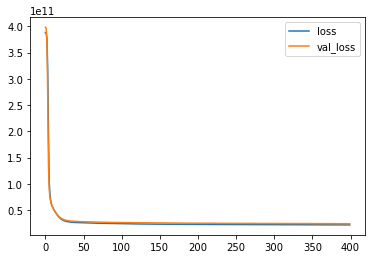

In [203]:
perda.plot()

In [210]:
model.evaluate(X_test,y_test,verbose=0)

23958065152.0

In [212]:
model.evaluate(X_train,y_train,verbose=0)

21604122624.0

In [204]:
X_test.shape

(6465, 18)

In [205]:
X_train.shape

(15084, 18)

In [206]:
pred_tf = model.predict(X_test)

MAE_tf = mean_absolute_error(y_test,pred_tf)
MSE_tf = mean_squared_error(y_test,pred_tf)
RMSE_tf = np.sqrt(MSE_tf)
R2_tf = r2_score(y_test,pred_tf)


print('MAE: ', MAE_tf)
print('MSE: ', MSE_tf)
print('RMSE: ', RMSE_tf)
print('R2_SCORE:',R2_tf)

MAE:  99026.73712055298
MSE:  23958073400.197254
RMSE:  154783.95717966786
R2_SCORE: 0.7841778013242772


In [213]:
df['price'].median()

450000.0

### Conforme observamos ao longo do caminho, o modelo de melhor desempenho foi o XGBoost seguido do KNNR. Não vou aqui fazer um data frame com os resultados, pois seria útil apenas visualmente, o que interessa é o resultado do modelo e o deploy com o menor resíduo possível. Até porque, dificilmente seu chefe vai se importar se o Mean Absolute Error ou Root Mean Squared Error estão com seus valores condizentes com os demais algorítmos. O que ele quer saber é: quanto de lucro vai render no final?

In [209]:
# DEFININDO O MODELO E REALIZANDO O DEPLOY.

In [100]:
scaled_X = std.fit_transform(X)

In [101]:
xgb_f = XGBRegressor(alpha= 0.3,colsample_bytree= 0.5,max_depth= 2,
                     n_estimators= 1000,subsample= 0.7)
xgb_f.fit(scaled_X,y)

pred_xgb_f = xgb_f.predict(scaled_X)

mae_xgb_f = mean_absolute_error(y,pred_xgb_f)
mse_xgb_f = mean_squared_error(y,pred_xgb_f)
rmse_xgb_f = mse_xgb_f**0.5
r2_xgb_f = r2_score(y,pred_xgb_f)

print('Mae: ',mae_xgb_f)
print('Mse: ',mse_xgb_f)
print('Rmse: ', rmse_xgb_f)
print('R2: ',r2_xgb_f)

Mae:  58646.83874831779
Mse:  7430196967.420899
Rmse:  86198.59028673786
R2:  0.9311451190806447


In [102]:
pred = pd.Series(pred_xgb_f.reshape(21549,))

In [103]:
pred

0        222242.515625
1        564174.000000
2        242507.484375
3        461875.718750
4        532822.875000
             ...      
21544    433159.562500
21545    486602.812500
21546    333041.531250
21547    427654.125000
21548    333888.218750
Length: 21549, dtype: float32

In [106]:
previsao = pd.DataFrame(pred,columns=['Valor_previsto'])

In [107]:
previsao

Valor_previsto
0       222242.515625
1       564174.000000
2       242507.484375
3       461875.718750
4       532822.875000
...               ...
21544   433159.562500
21545   486602.812500
21546   333041.531250
21547   427654.125000
21548   333888.218750

[21549 rows x 1 columns]

In [108]:
target = pd.DataFrame(y,columns=['Preco_atual'])

In [109]:
res = y-pred

In [110]:
residuos = pd.DataFrame(res,columns=['Residuos'])

In [111]:
df_final = pd.concat([previsao,target,residuos],axis=1)

In [112]:
df_final.head()

Valor_previsto  Preco_atual       Residuos
0   222242.515625     221900.0    -342.515625
1   564174.000000     538000.0  -26174.000000
2   242507.484375     180000.0  -62507.484375
3   461875.718750     604000.0  142124.281250
4   532822.875000     510000.0  -22822.875000

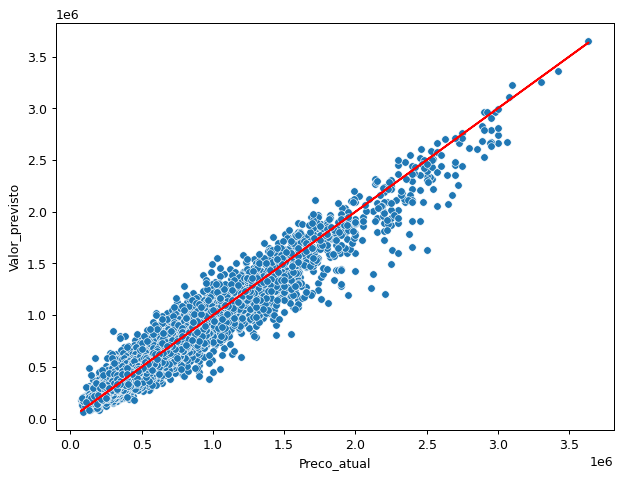

In [113]:
resizeplot(8,6,90)
sns.scatterplot(x='Preco_atual',y='Valor_previsto',data=df_final)
plt.plot(y,y,'r')

### Vamos visualisar o plot dos resíduos e esperar que eles estejam distribuídos e torno de 0, pois saberíamos que teria um ajuste perfeito.

<AxesSubplot:ylabel='Count'>

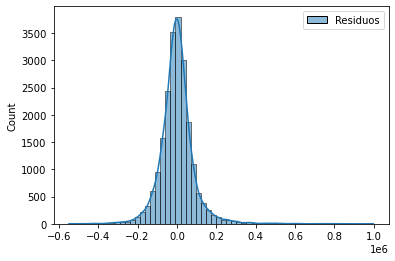

In [114]:
sns.histplot(residuos,kde=True,bins=60)

### Perfeito! ou bem próximo. Agora fazemos o deploy.

In [135]:
dump(xgb_f,'Sales_County.pkl')

['Sales_County.pkl']

In [132]:
dump(list(X.columns),'col_names.pkl')

['col_names.pkl']

In [ ]:
#loaded_model = load('sales_model.joblib')

In [ ]:
#def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
 #   model.fit(X_train,y_train)
    
    # Get Metrics
    
  #  preds = model.predict(X_test)
    
   # rmse = np.sqrt(mean_squared_error(y_test,preds))
    #print(f'RMSE : {rmse}')